# Комп'ютерне моделювання задач прикладної математики

## Дифузія невзаємодіючих частинок. Рівняння Ланжевена

###  Лабораторна робота 1

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 2* 

In [1]:
from matplotlib import pyplot as plt

In [2]:
import random
import numpy as np
import math
import time

Функція випадкової величини.

In [3]:
def ksi():
    max_num = 2147483647
    p1 = random.randint(0, max_num) / (max_num+1)
    p2 = random.randint(0, max_num) / (max_num+1)
    if (p1==0):
        p1 = 1e-10
    if (p2==0):
        p2 = 1e-10
    return math.sqrt(-2*math.log(p1)) * math.sin(2*math.pi*p2)

#ksi()

Функція, що розраховує координати частинок, час за який кожна з них вийде з інтервалу (-R,R) та середній час по всім частинкам.

In [4]:
def funct2(R=5,D=1):

    t = 0                  # початковий момент часу
    dt = 0.002             # крок по часу 2*(1e-3)
    
    N = 1000              # кількість точок(частинок)
    
    x = np.zeros(N)        # зануляємо початкові координати точок
    times = np.zeros(N)    # час для кожної частинки коли вона вийшла за межі інтервалу (-R,R)
    
    # mean pasage time (середній час досягнення значення R)
    mpt = 0
    
    for i in range(x.size):
        t=0
        while(abs(x[i]) < R):
            x[i] += math.sqrt(D*dt)*ksi()
            if (abs(x[i]) >= R):
                times[i] = t
            t += dt    
            
    mpt = np.mean(times)
    
    #print("R","\t D","\t mpt")
    print(R, "\t", D,"\t", mpt)
    
    return x, times, mpt   

* *Розрахуємо дані для D = [ 0.1, 0.2, 0.5, 1 ], R = 5.*

In [5]:
start_time = time.time()

D = [0.1, 0.2, 0.5, 1]
x = []             # координати частинок
t = []             # час для кожної частинки коли вона вийшла за межі інтервалу (-R,R)
mpt = []           # mean pasage time (середній час досягнення значення R)

print("R","\t D","\t mpt")

for i in range(len(D)):
    x_, t_, mpt_ = funct2(R = 5, D = D[i])
    x.append(x_)
    t.append(t_)
    mpt.append(mpt_)
    
print("--- %s seconds ---" % (time.time() - start_time))    

R 	 D 	 mpt
5 	 0.1 	 250.7091780000322
5 	 0.2 	 124.41766800011091
5 	 0.5 	 51.393056000002964
5 	 1 	 25.78134800000055
--- 825.3829946517944 seconds ---


In [6]:
print(np.shape(x))
print(np.shape(t))
print(np.shape(mpt))

(4, 1000)
(4, 1000)
(4,)


* *Розрахуємо дані для D = 1, R = [ 0.1, 0.2, 0.5, 1 ].*

In [7]:
start_time = time.time()

D_new = 1
R_new = [0.1, 0.2, 0.5, 1]
x_new = []             # координати частинок
t_new = []             # час для кожної частинки коли вона вийшла за межі інтервалу (-R,R)
mpt_new = []           # mean pasage time (середній час досягнення значення R)

print("R","\t D","\t mpt")

for i in range(len(R_new)):
    x_, t_, mpt_ = funct2(R = R_new[i], D = D_new)
    x_new.append(x_)
    t_new.append(t_)
    mpt_new.append(mpt_)
    
print("--- %s seconds ---" % (time.time() - start_time))  

R 	 D 	 mpt
0.1 	 1 	 0.014758000000000007
0.2 	 1 	 0.04840000000000003
0.5 	 1 	 0.26764200000000016
1 	 1 	 1.05781199999999
--- 2.6031553745269775 seconds ---


In [8]:
print(np.shape(x_new))
print(np.shape(t_new))
print(np.shape(mpt_new))

(4, 1000)
(4, 1000)
(4,)


Функція, що априксимує дані, повертає: \
  ~ coef - коефіцієнти рівняння, яке відповідає початковим даним, \
  ~ polinom - рівняння з коефіцієнтами, \
  ~ mpt_to_compare - значення функції для порівняння зі початковими  

In [9]:
def fun_aprox(X, mpt):

    k=1
    mpt_new = mpt*0
    eps = 1000
    
    bool_mpt = 0
    
    while ((bool_mpt < np.size(mpt)) & (eps >= 0.00001) & (k<10)):
        
        coef = np.polyfit(X, mpt,k)
        polinom = np.poly1d(coef)
        mpt_to_compare = polinom(X)
        
        mpt_old = np.round(mpt,5)
        mpt_to_compare = np.round(mpt_to_compare,5)
        
        eps = abs(mpt_old[0] - mpt_to_compare[0])
        
        bool_mpt = np.sum(mpt_old == mpt_to_compare)
        
        #print("\n k =",k)
        #print("coef:", coef)
        #print("y = aprox(x):\n",polinom)
        #print("Перевiрка:\n", " X =", X, "\n mpt =    ", mpt_old,"\n mpt_to_compare =", mpt_to_compare)
        #print("bool_mpt =",bool_mpt)
        #print("eps =",eps)
        
        k += 1
        
    print("coef:", coef)
    print("y = aprox(x) :\n",polinom)
    print("Перевiрка:\n", " X =", X, "\n", mpt_old, "= mpt\n",mpt_to_compare,"= mpt_to_compare")
    
    return coef, polinom, mpt_to_compare

#c0, p0,mpt_to_compare0 =  fun_aprox(D, mpt)

Побудуємо тепер початкові дані та знайдену криву (або криві y = 25/D та y = R^2 відповідно).

* Графік для D = [ 0.1, 0.2, 0.5, 1 ], R = 5.

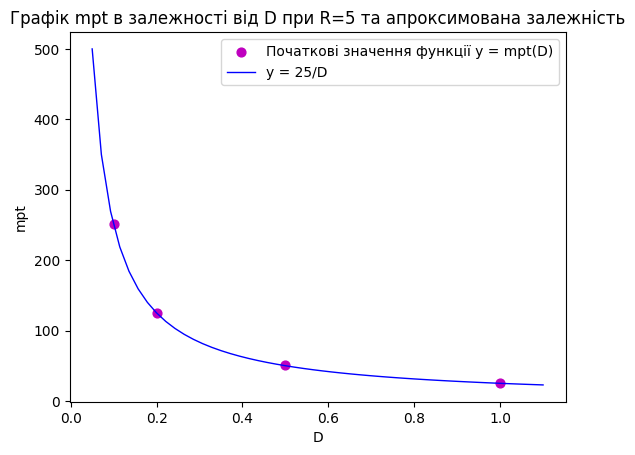

In [10]:
def fun_plot21_(mpt, D = [0.1, 0.2, 0.5, 1], R = 5): 
    
    plt.scatter(D, mpt, label="Початковi значення функції y = mpt(D)", s=40, c='m') 
    
    D_new = np.linspace(0.05, 1.1, 50)
    
    # порівняння з кривою y = 25/D
    mpt_new = 25 / D_new
    plt.plot(D_new, mpt_new, label= "y = 25/D", linewidth = 1, c='b')
    
    # порівняння з апроксимованою кривою деякого степеня
    # coef, polinom, mpt_to_compare = fun_aprox(D, mpt)
    # mpt_new = polinom(D_new)
    # plt.plot(D_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='c')
    
    plt.xlabel("D") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від D при R=" f'{R}' " та апроксимована залежність")
    plt.legend()
    
fun_plot21_(mpt)

* Графік для D = 1,  R = [ 0.1, 0.2, 0.5, 1 ].

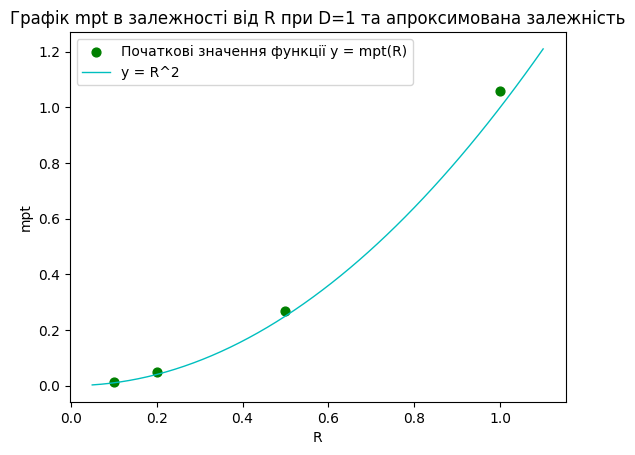

In [11]:
def fun_plot22_(mpt, D = 1, R = [0.1, 0.2, 0.5, 1]): 
    
    plt.scatter(R, mpt, label="Початковi значення функції y = mpt(R)", s=40, c='g') 
    
    R_new = np.linspace(0.05, 1.1, 50)
    
    # порівняння з кривою y = R^2
    mpt_new = R_new**2
    plt.plot(R_new, mpt_new, label= "y = R^2",linewidth = 1,c='c')
    
    # порівняння з апроксимованою кривою деякого степеня
    # coef, polinom, mpt_to_compare = fun_aprox(R, mpt)
    # mpt_new = polinom(R_new)
    # plt.plot(R_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='b')
    
    plt.xlabel("R") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від R при D=" f'{D}' " та апроксимована залежність")
    plt.legend()
    
fun_plot22_(mpt_new)

Побудуємо тепер дані у логарифмованих осях.

* Графік для D = [ 0.1, 0.2, 0.5, 1 ], R = 5.

coef: [-0.02057347 -0.06621876 -1.0312605   3.24965128]
y = aprox(x) :
           3           2
-0.02057 x - 0.06622 x - 1.031 x + 3.25
Перевiрка:
  X = [-2.30258509 -1.60943791 -0.69314718  0.        ] 
 [5.52429 4.82364 3.9395  3.24965] = mpt
 [5.52429 4.82364 3.9395  3.24965] = mpt_to_compare


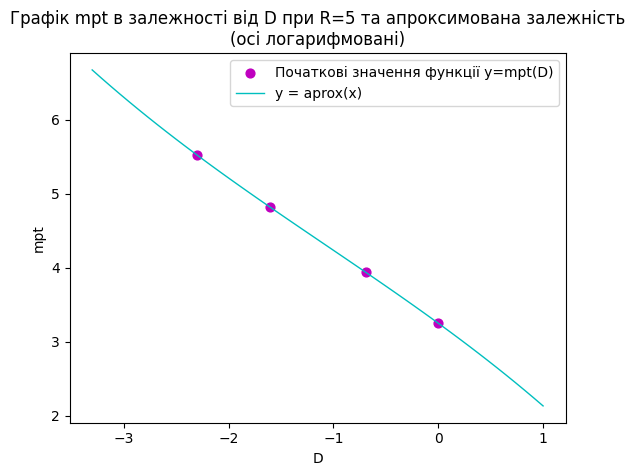

In [12]:
def fun_plot21_log(mpt, D = [0.1,0.2,0.5,1], R = 5): 
    
    D = np.log(D)
    mpt = np.log(mpt)
    plt.scatter(D, mpt, label="Початковi значення функції y=mpt(D)", s=40, c='m') 
    
    D_new = np.linspace(D[0]-1, D[len(D)-1]+1,50)
    
    coef, polinom, mpt_to_compare = fun_aprox(D, mpt)
    mpt_new = polinom(D_new)
    plt.plot(D_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='c')
    
    plt.xlabel("D") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від D при R=" f'{R}' " та апроксимована залежність\n(осі логарифмовані)")
    plt.legend()
    
fun_plot21_log(mpt)    

* Графік для D = 1, R = [ 0.1, 0.2, 0.5, 1 ].

coef: [-0.00986316  0.0495646   2.02180116  0.05620262]
y = aprox(x) :
            3           2
-0.009863 x + 0.04956 x + 2.022 x + 0.0562
Перевiрка:
  X = [-2.30258509 -1.60943791 -0.69314718  0.        ] 
 [-4.21597 -3.02826 -1.31811  0.0562 ] = mpt
 [-4.21597 -3.02826 -1.31811  0.0562 ] = mpt_to_compare


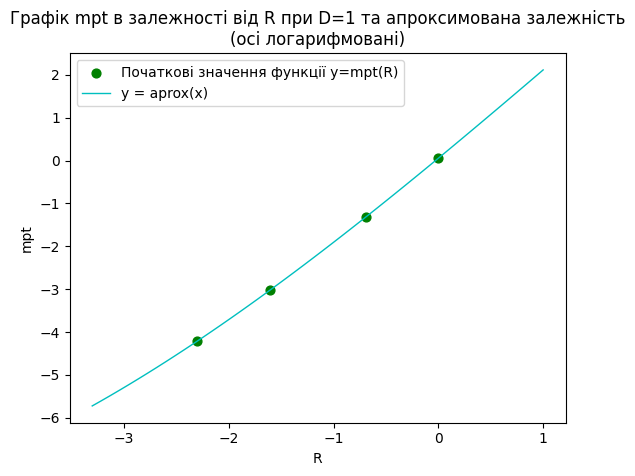

In [13]:
def fun_plot22_log(mpt, D = 1, R = [0.1, 0.2, 0.5, 1]): 
    
    R = np.log(R)
    mpt = np.log(mpt)
    plt.scatter(R, mpt, label="Початковi значення функції y=mpt(R)", s=40, c='g') 
    
    coef, polinom, mpt_to_compare = fun_aprox(R, mpt)
    
    R_new = np.linspace(R[0]-1, R[len(R)-1]+1,50)
    mpt_new = polinom(R_new)
    plt.plot(R_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='c')
    
    plt.xlabel("R") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від R при D=" f'{D}' " та апроксимована залежність\n(осі логарифмовані)")
    plt.legend()
    
fun_plot22_log(mpt_new)    

Побудуємо гістограму з осями часу та частоти.

In [14]:
#!pip install seaborn

In [15]:
import seaborn as sns
import pandas as pd

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
def fun_histograma(time, D, R): 
    
    # Графік частоти та функції розподілу
    sns_plot = sns.distplot(time,label="D=" f'{D}')
    #sns.distplot(time, rug=True, hist=True, label="D=" f'{D}')

    # Графік тільки функції розподілу
    #snsplot = sns.kdeplot(time, shade=True,label="D=" f'{D}')
    #fig = snsplot.get_figure()
    
    plt.xlabel('time')
    plt.ylabel('frequency(P)')
    plt.title("Гістограма (R = " f'{R}'")")
    plt.legend()
    #plt.show()
    
#t0, D0 = t[0], D[0]
#fun_histograma(t0, D0)

In [18]:
t1, t2 = t[0], t[3]
D1, D2 = D[0], D[3]
R_ = 5
print("D1 =", D1, "\nD2 =", D2, "\nR_ =", R_)

D1 = 0.1 
D2 = 1 
R_ = 5


Будуємо гістограми для даних з D=0.1 і D=1.

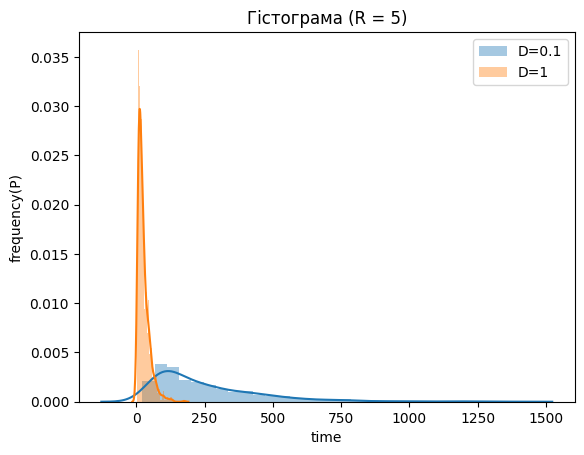

In [19]:
fun_histograma(t1, D1, R_)
fun_histograma(t2, D2, R_)

Будуємо гістограми для даних з D=0.1 і D=1 з логарифмованою оссю Х.

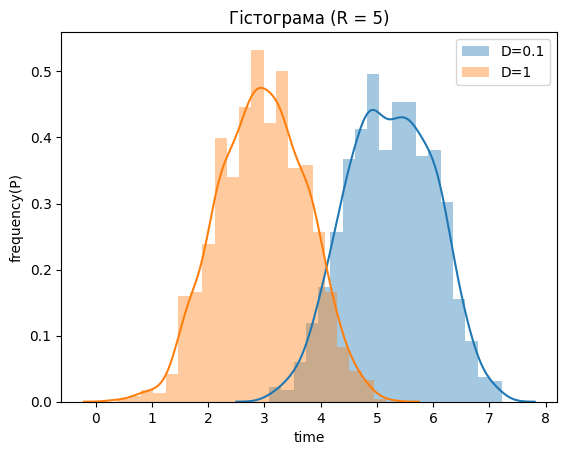

In [20]:
fun_histograma(np.log(t1), D1, R_)
fun_histograma(np.log(t2), D2, R_)

### ----------------------------------------------------------------------------------------------------------------------------------------------------

*Наступні кроки не обов'язкові для виконання тому тип комірки вибраний не 'Код' ('Code'), а 'Необроблений NBConvent' ('Raw NBConvent').*

**Тепер підкорегуємо дані та побудуємо гістограми знову.**

* *1 варіант. Відмасштабуємо дані.*

* *2 варіант. Нормалізуємо дані.*

Або наступним чином:

# ------------------------------------------------------------------------------------------------------------